# L04: Image Resizing

Today you'll be generating "image pyramids." In class, we defined the 5-element kernel for computing the Gaussian Image Pyramid as follows:

$$ k = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4 \end{bmatrix} = \begin{bmatrix} c \\ b \\ a \\ b \\ c \end{bmatrix} = \begin{bmatrix} 1/4 - a/2 \\ 1/4 \\ a \\ 1/4 \\ 1/4 - a/2 \end{bmatrix} $$

where $a$ is a free parameter, usually between 0.3 and 0.6.

### L04B.1 1D Gaussian "Image Pyramid"

you should create a Gaussian image pyramid using the kernel for different values of $a$. You should try not use the `scipy.signal.convolve` function in your implementation; "correctly" handling the boundary conditions is part of what I am hoping you will think deeply about!

To visualize the pyramid, add all the images to a single rectangular image, as in the example from class:

<img src="image_pyramid.png" alt="Image Pyramid" style="width: 400px;"/>

The image I have given you is 1025x1025 pixels. Conceptual question: What is the size of the smallest rectangular image that can fit the image pyramid?

**We will start by making a "Gaussian Pyramid" of a 1D signal** (in fact, the same signal from last time). Below, I have provided a simple function that naively *reduces* (downsamples by a factor of 2) the signal using Nearest Neighbor. You should implement the `gaussian_reduce` function using either of the versions I have started below. How does your Gaussian Pyramid output differ from the nearest neighbor solution?

If you finish, think about how you would extend this function to work for a 2D.

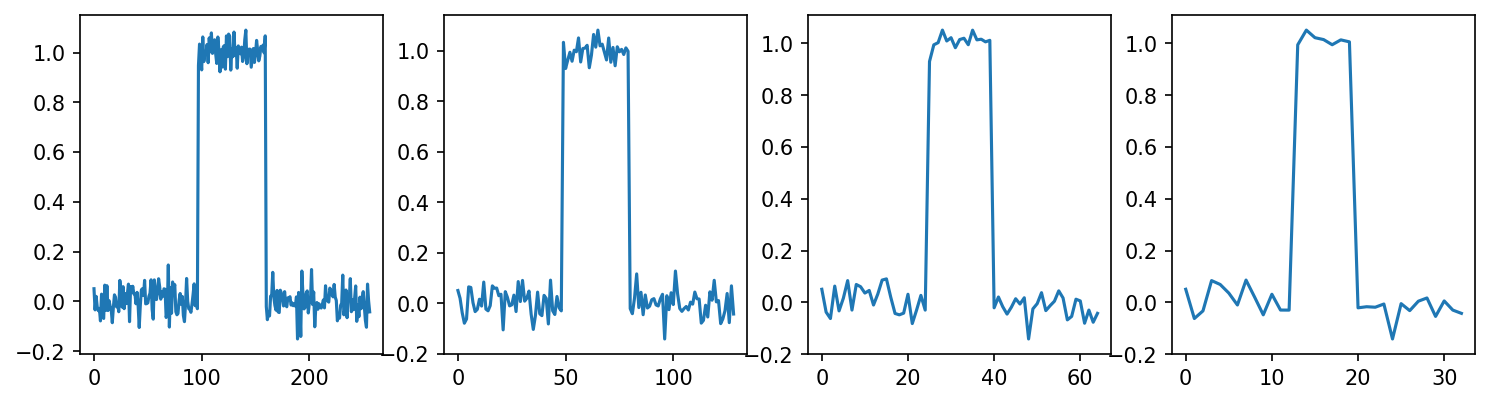

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

def compute_example_signal(length=256, step_width=64):
    step_center = length//2
    x = np.arange(length) - step_center
    signal = (np.abs(x) < step_width/2).astype(float)
    # Add noise to the signal
    signal += np.random.normal(scale=0.05, size=signal.shape)
    return signal

def nearest_neighbor_reduce(signal):
    """Takes in a signal and returns a downsampled 
    version of that signal using nearest neighbor."""
    return signal[::2]

plt.figure(dpi=150, figsize=(12, 3))
signal = compute_example_signal(length=256+1)
plt.subplot(1, 4, 1)
plt.plot(signal)

plt.subplot(1, 4, 2)
signal = nearest_neighbor_reduce(signal)
plt.plot(signal)

plt.subplot(1, 4, 3)
signal = nearest_neighbor_reduce(signal)
plt.plot(signal)

plt.subplot(1, 4, 4)
signal = nearest_neighbor_reduce(signal)
plt.plot(signal)
plt.show()

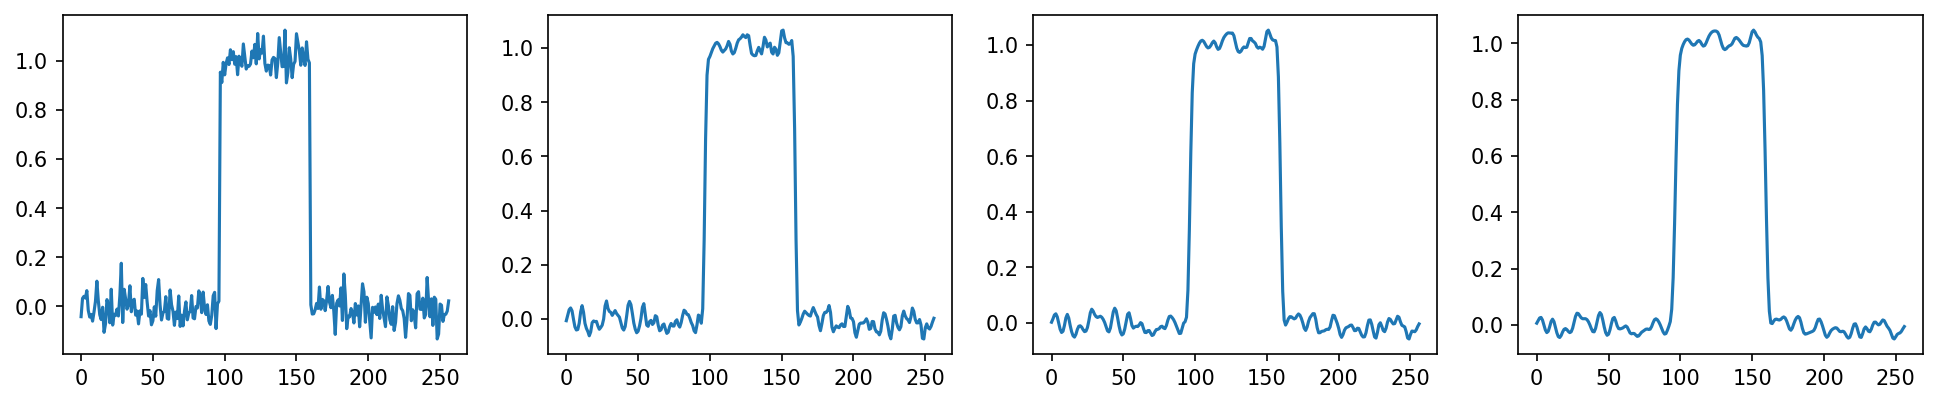

In [7]:
## Now do the same thing with the Gaussian Pyramid kernel from class:
# Implement either of these 'reduce' functions:
def gaussian_reduce(signal):
    a = 0.4
    kernel = np.array([
        1/4 - a/2,
        1/4,
        a,
        1/4,
        1/4 - a/2   
    ])
    return scipy.signal.convolve(signal, kernel, mode='same')


plt.figure(dpi=150, figsize=(16, 3))
signal = compute_example_signal(length=256+1)
plt.subplot(1, 4, 1)
plt.plot(signal)

plt.subplot(1, 4, 2)
signal = gaussian_reduce(signal)
plt.plot(signal)

plt.subplot(1, 4, 3)
signal = gaussian_reduce(signal)
plt.plot(signal)

plt.subplot(1, 4, 4)
signal = gaussian_reduce(signal)
plt.plot(signal)


### L04B.2 [Post-Class Optional Exercise] 2D Gaussian Image Pyramid

Once you have generated a 1D 'pyramid', you should have an idea of how you might generalize this concept to work in 2D, something you will need to do for your homework. Using the image I have provided below (`lake_long_exposure_scene.png`), extend your `gaussian_reduce` function above to accept 2D inputs. *Note*: thinking about how to apply the kernel is the key here. Do you need to make a separate 2D kernel, or is it sufficient to apply the 1D kernel along the two different axes?

In [ ]:
## Once you're done, you can do the same thing for this image
## by extending your gaussian_reduce function to handle 2D input.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(np.float)/255)[:, :, :3]

image = load_image("lake_long_exposure_scene.png")
fig = plt.figure(figsize=(4, 4), dpi=150)
plt.imshow(image)
None

In [ ]:
## Hint code to make progress
def gaussian_reduce(signal):
    kernel = None
    if kernel is None:
        raise NotImplementedError("Define the kernel for the Gaussian Reduce function.")
    out_signal = scipy.signal.convolve(signal, kernel, mode='same')
    return out_signal[::2]